In [26]:
import pandas as pd #DataFrame Purpose
import numpy as np #For Mathematical Calculations
import matplotlib.pyplot as plt #Plotting Charts
import seaborn as sns #Plotting Charts

In [54]:
df = sns.load_dataset('iris')

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


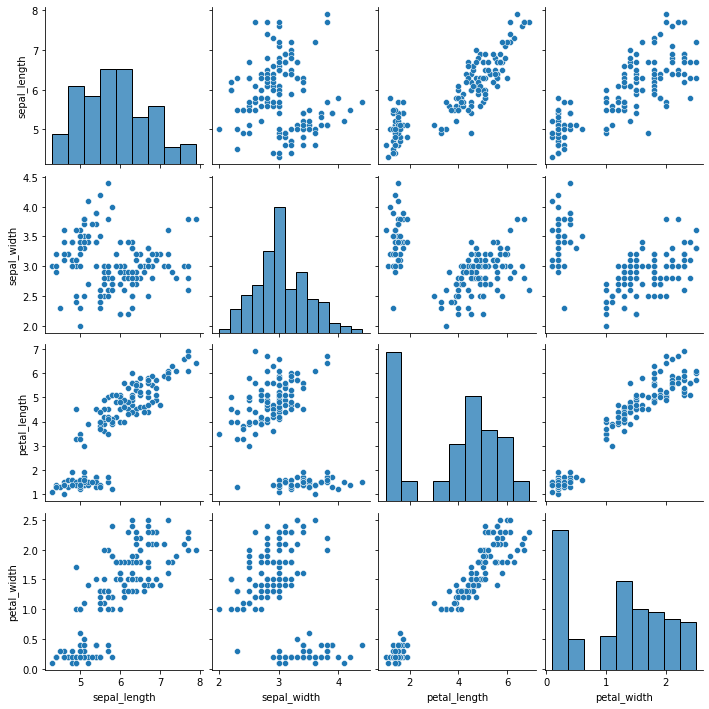

In [29]:
sns.pairplot(df)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


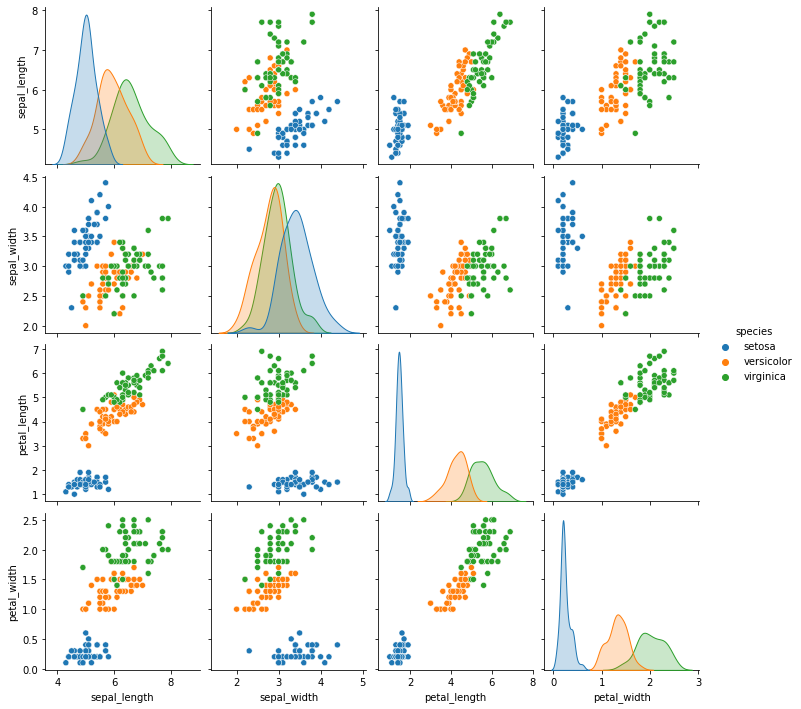

In [31]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

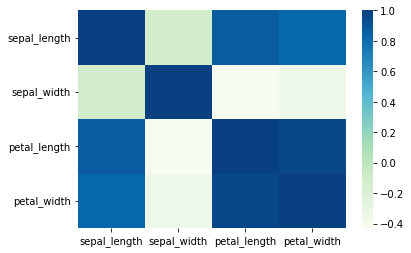

In [32]:
sns.heatmap(df.corr(),cmap='GnBu')

#Findingss...
    1. Petal Length Corr Sepal Length
    2. Petal Width Corf Sepal Length
    3. Petal Length Corr Petal Width

In [33]:
y = df['species']

In [34]:
type(y)

pandas.core.series.Series

In [35]:
X =df.drop('species',axis=1)

In [36]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
from sklearn.preprocessing import LabelEncoder #for encoding Categorical Values

In [38]:
le =LabelEncoder()

In [39]:
y = le.fit_transform(y)

In [40]:
from sklearn.model_selection import train_test_split #Hold-Out Method

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree
from sklearn.tree import plot_tree # For plotting

In [43]:
dtree=DecisionTreeClassifier()

In [44]:
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [45]:
y_pred = dtree.predict(X_test)

In [46]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

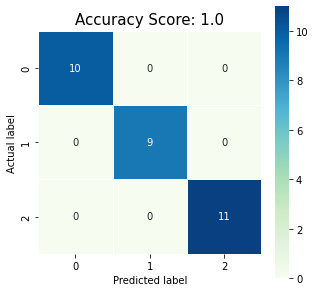

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'GnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [48]:
pip install graphvizplt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement graphvizplt (from versions: none)
ERROR: No matching distribution found for graphvizplt
You should consider upgrading via the 'c:\users\akanksha goel\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


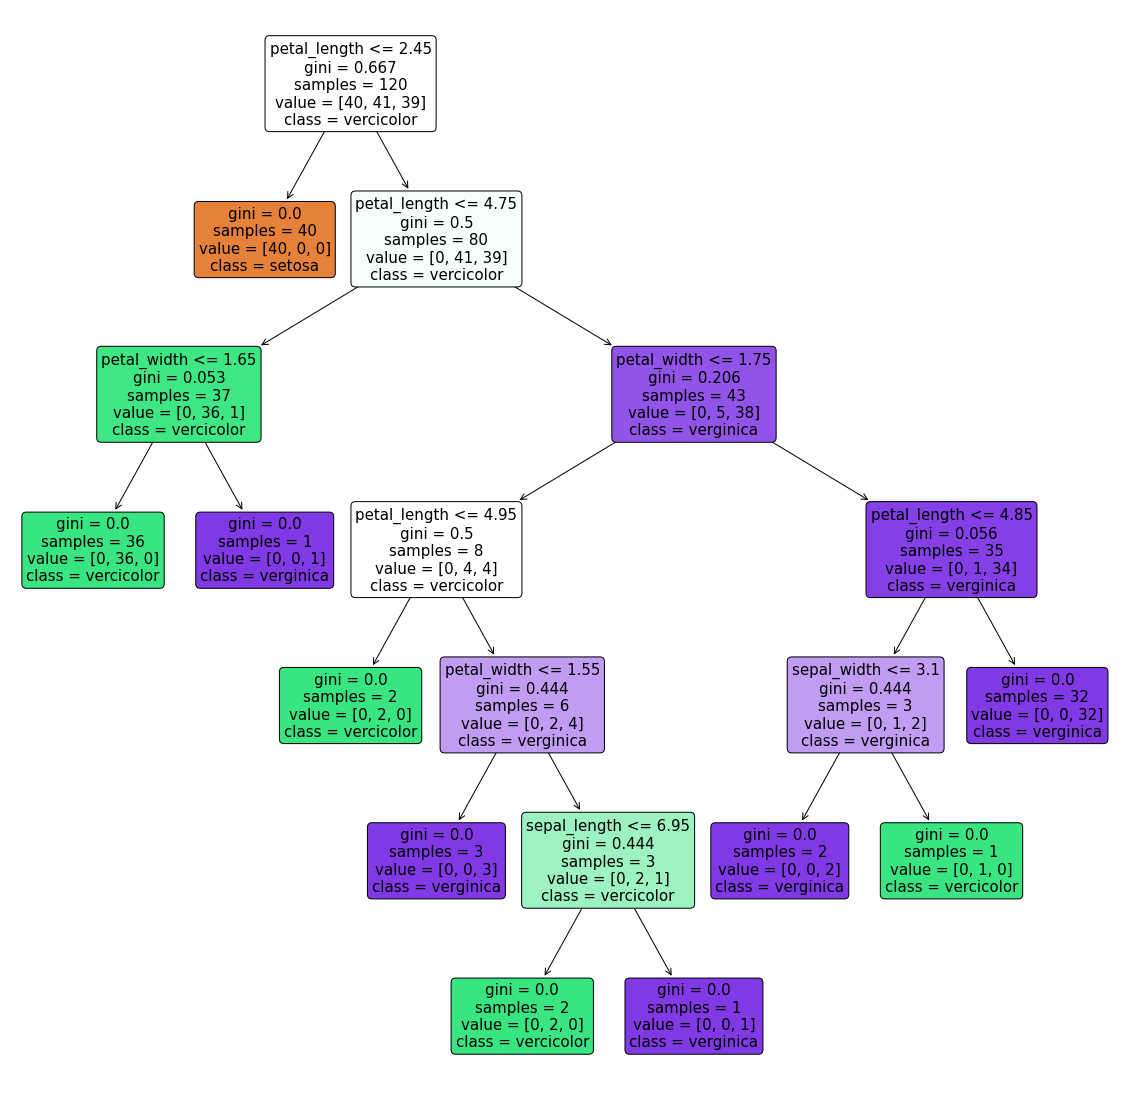

In [49]:
plt.figure(figsize=(20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] ,
                     filled = True , 
#                      precision = 4, 
                     rounded = True)

In [58]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

from sklearn import datasets
iris=datasets.load_iris()

In [59]:
X, y= iris.data, iris.target

In [60]:
dtm = tree.DecisionTreeClassifier()
kf = KFold(n_splits=3, shuffle=True)
scores=[]

for train,test in kf.split(X,y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    dtm.fit(X_train,y_train)
    pred=dtm.predict(X_test)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    scores.append(dtm.score(X_test, y_test))
    
print("\n\nMean accuracy: ", np.mean(scores))

[[23  0  0]
 [ 0 11  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.92      0.92      0.92        12
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50

[[15  0  0]
 [ 0 20  0]
 [ 0  2 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        20
           2       1.00      0.87      0.93        15

    accuracy                           0.96        50
   macro avg       0.97      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

[[12  0  0]
 [ 0 16  2]
 [ 0  1 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1      